# Test

### Load data

In [54]:
import pickle
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def load_data(data_name):
    pkl_file = open(data_name + '.pkl', 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

test_label = load_data('test_bi')
predicted = load_data('predicted_bi')

print(np.shape(test_label))
print(np.shape(predicted))

(780, 73, 2)
(780, 73, 2)


### Metrics 

Cutoffs (L∕10, L∕5, L∕2 and L)

"Pairwise_score" is for machine learning methods and "score" is for neural methods

In [55]:
# Accuracy

def pairwise_score(test_label, predicted, metric):
    
    score = []
    pred = []
    test = []

    for i in range(np.shape(test_label)[0]):
        pred = []
        test = []

        for j in range(np.shape(test_label)[1]):
            pred.append(predicted[i][j])
            test.append(test_label[i][j])

        if metric == 'accuracy':
            score.append(accuracy_score(test, pred))
        elif metric == 'f1':
            score.append(f1_score(test, pred))
        else:
            raise ValueError('No metric was found')

    score = np.array(score)
    score[::-1].sort()

    L = np.mean(score)
    L_2 = np.mean(score[:len(score) // 2])
    L_5 = np.mean(score[:len(score) // 5])
    L_10 = np.mean(score[:len(score) // 10])
    
    return L, L_2, L_5, L_10

def score(test_label, predicted, metric):
    
    score = []
    pred = []
    test = []

    for i in range(np.shape(test_label)[1]):
        pred = []
        test = []

        for j in range(np.shape(test_label)[0]):
            pred.append(np.argmax(predicted[j][i]))
            test.append(np.argmax(test_label[j][i]))

        if metric == 'accuracy':
            score.append(accuracy_score(test, pred))
        elif metric == 'f1':
            score.append(f1_score(test, pred))
        else:
            raise ValueError('No metric was found')

    score = np.array(score)
    score[::-1].sort()

    L = np.mean(score)
    L_2 = np.mean(score[:len(score) // 2])
    L_5 = np.mean(score[:len(score) // 5])
    L_10 = np.mean(score[:len(score) // 10])
    
    return L, L_2, L_5, L_10

In [36]:
pairwise_score(test_label, predicted, 'accuracy')

(0.9362585771036476,
 0.9665567765567766,
 0.9887362637362636,
 0.9923076923076923)

In [35]:
pairwise_score(test_label, predicted, 'f1')

(0.7989914924187449,
 0.8839333405980416,
 0.9576484424821008,
 0.9725205614187568)

In [56]:
test_matrix = [[[0] * 40 for i in range(40)] for i in range(np.shape(test_label)[1])]
pred_matrix = [[[0] * 40 for i in range(40)] for i in range(np.shape(test_label)[1])]

for i in range(np.shape(test_label)[1]):
    cnt = 0
    for j in range(40):
        for k in range(j + 1, 40):
            test_matrix[i][j][k] = np.argmax(test_label[cnt][i])
            test_matrix[i][k][j] = np.argmax(test_label[cnt][i])
            
            pred_matrix[i][j][k] = np.argmax(predicted[cnt][i])
            pred_matrix[i][k][j] = np.argmax(predicted[cnt][i])
            
            cnt += 1

### Triangle to matrix

In [39]:
test_matrix = [[[0] * 40 for i in range(40)] for i in range(np.shape(test_label)[0])]
pred_matrix = [[[0] * 40 for i in range(40)] for i in range(np.shape(test_label)[0])]

for i in range(np.shape(test_label)[0]):
    cnt = 0
    for j in range(40):
        for k in range(j + 1, 40):
            test_matrix[i][j][k] = test_label[i][cnt]
            test_matrix[i][k][j] = test_label[i][cnt]
            
            pred_matrix[i][j][k] = predicted[i][cnt]
            pred_matrix[i][k][j] = predicted[i][cnt]
            
            cnt += 1

In [58]:
test_matrix = np.array(test_matrix)
pred_matrix = np.array(pred_matrix)

In [59]:
test_matrix.shape, pred_matrix.shape

((73, 40, 40), (73, 40, 40))

### Visualization

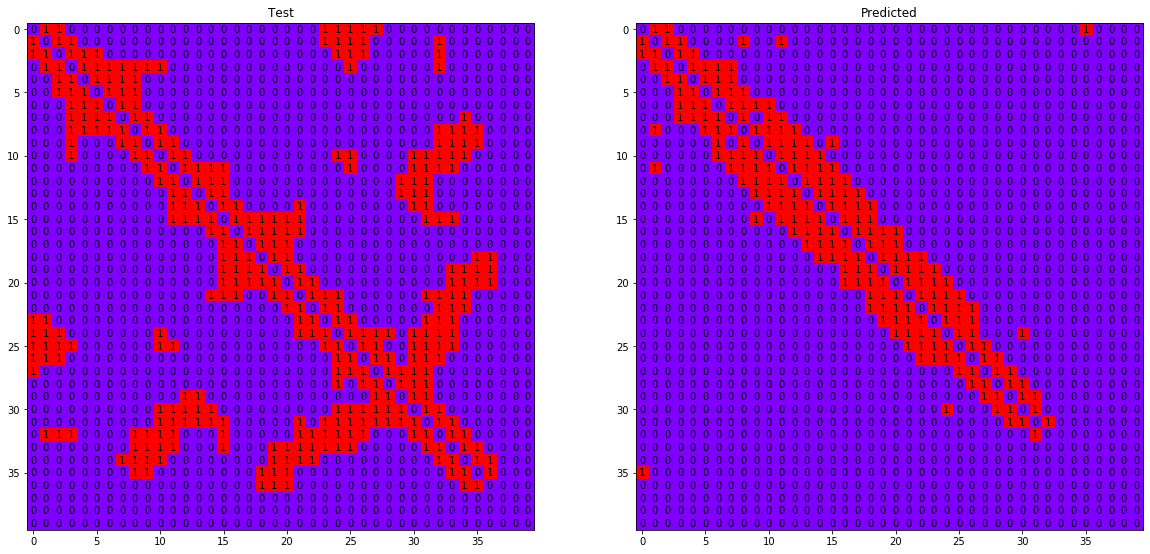

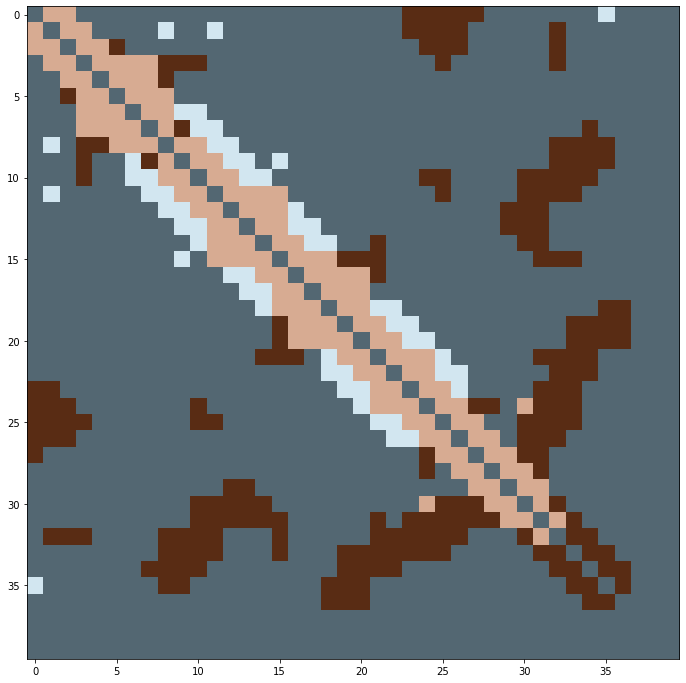

In [63]:
prot_number = 2

visual_pred = pred_matrix[prot_number]
visual_test = test_matrix[prot_number]

visual_pred[(visual_pred != 0) & (visual_pred <= 16) | (visual_pred == 63)] = 1
visual_test[(visual_test != 0) & (visual_test <= 16) | (visual_test == 63)] = 1

visual_pred[(visual_pred > 16) & (visual_pred != 63)] = 0
visual_test[(visual_test > 16) & (visual_test != 63)] = 0

fig, (ax1, ax2)=plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))

ax1.set_title('Test')
ax1.imshow(visual_test, cmap='rainbow')

for i in range(40):
        for j in range(40):
            text = ax1.text(j, i, visual_test[i, j],
                           ha="center", va="center", color="black")
            
ax2.set_title('Predicted')
ax2.imshow(visual_pred, cmap='rainbow')

for i in range(40):
        for j in range(40):
            text = ax2.text(j, i, visual_pred[i, j],
                           ha="center", va="center", color="black")

plt.show()


def visualize(prot_number):
    visual_pred = pred_matrix[prot_number]
    visual_test = test_matrix[prot_number]
    fig=plt.figure(figsize=(12, 12))
    fig.add_subplot(1, 1, 1)
    plt.imshow(visual_test, cmap='Paired')
    plt.imshow(visual_pred, alpha=.5, cmap='gray')
    plt.show()

visualize(prot_number)